In [1]:
import pandas as pd

sentiment = pd.read_csv('/content/fear_greed_index.csv')
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [2]:

trades = pd.read_csv('/content/historical_data.csv')
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:

print("Sentiment missing:", sentiment.isnull().sum())
print("Trades missing:", trades.isnull().sum())

print(sentiment.dtypes)
print(trades.dtypes)


Sentiment missing: timestamp         0
value             0
classification    0
date              0
dtype: int64
Trades missing: Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64
timestamp          int64
value              int64
classification    object
date              object
dtype: object
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
T

In [6]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [9]:
trades['date'] = trades['Timestamp IST'].dt.date
sentiment['date'] = sentiment['date'].dt.date

df = pd.merge(trades, sentiment, on='date', how='inner')
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


In [10]:

df.describe()


,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,timestamp,value
count,211218.000000,2.112180e+05,2.112180e+05,211218,2.112180e+05,211218.000000,2.112180e+05,211218.000000,2.112180e+05,2.112180e+05,2.112180e+05,211218.000000
mean,11415.047529,4.623341e+03,5.639192e+03,2025-01-31 12:08:21.724569344,-2.994671e+04,48.549304,6.965470e+10,1.163960,5.628506e+14,1.737745e+12,1.738301e+09,51.649656
min,0.000005,8.740000e-07,0.000000e+00,2023-05-01 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,1.682919e+09,10.000000
25%,4.858550,2.940000e+00,1.937900e+02,2024-12-31 21:53:45,-3.760725e+02,0.000000,5.984223e+10,0.016121,2.810000e+14,1.740000e+12,1.735623e+09,33.000000
50%,18.280000,3.200000e+01,5.970200e+02,2025-02-24 18:55:00,8.477051e+01,0.000000,7.442939e+10,0.089572,5.620000e+14,1.740000e+12,1.740375e+09,49.000000
75%,101.895000,1.878900e+02,2.058878e+03,2025-04-02 18:22:00,9.337697e+03,5.790132,8.335543e+10,0.393774,8.460000e+14,1.740000e+12,1.743572e+09,72.000000
max,109004.000000,1.582244e+07,3.921431e+06,2025-05-01 12:13:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12,1.746077e+09,94.000000
std,29448.010305,1.042744e+05,3.657557e+04,NaN,6.738170e+05,917.989791,1.835714e+10,6.758948,3.257541e+14,8.689946e+09,8.029302e+06,21.012784


In [12]:
df['classification'].value_counts()

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


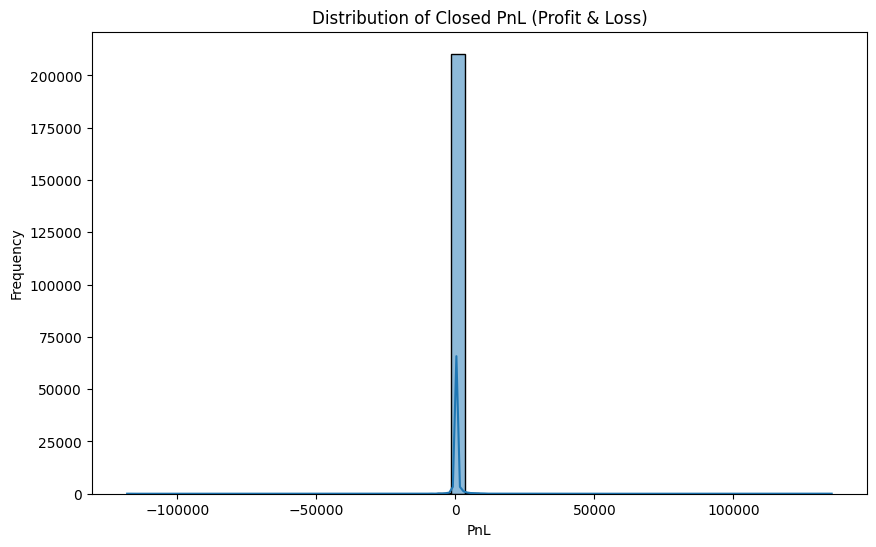

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Closed PnL'], bins=50, kde=True)
plt.title('Distribution of Closed PnL (Profit & Loss)')
plt.xlabel('PnL')
plt.ylabel('Frequency')
plt.show()

In [16]:
df.groupby('classification')['Closed PnL'].mean()

,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


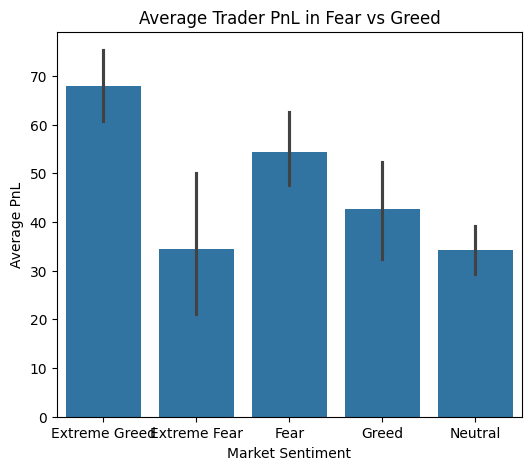

In [18]:
plt.figure(figsize=(6, 5))
sns.barplot(x='classification', y='Closed PnL', data=df)
plt.title('Average Trader PnL in Fear vs Greed')
plt.ylabel('Average PnL')
plt.xlabel('Market Sentiment')
plt.show()

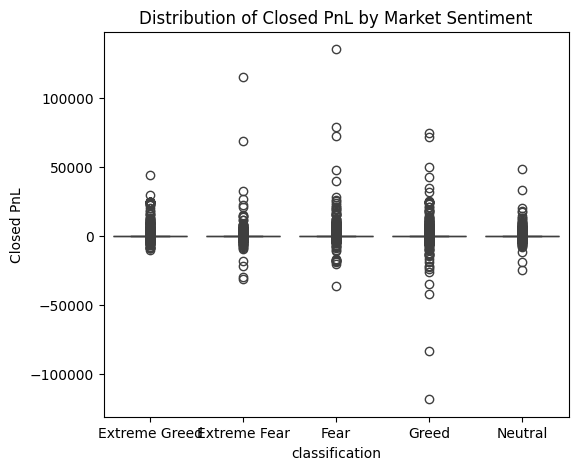

In [20]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='classification', y='Closed PnL', data=df)
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.show()

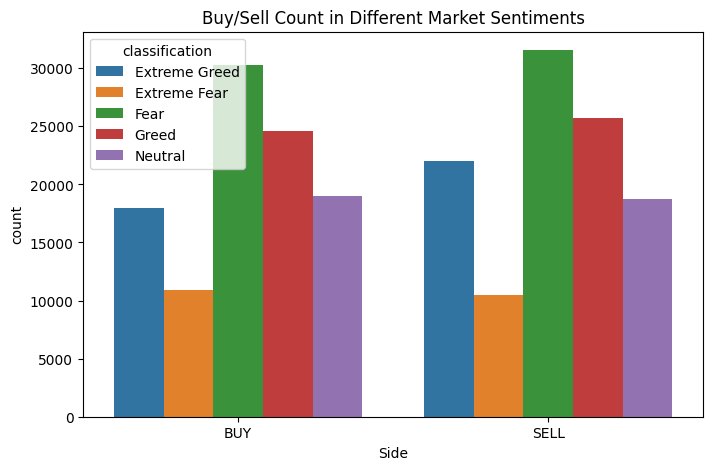

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Side', hue='classification', data=df)
plt.title('Buy/Sell Count in Different Market Sentiments')
plt.show()

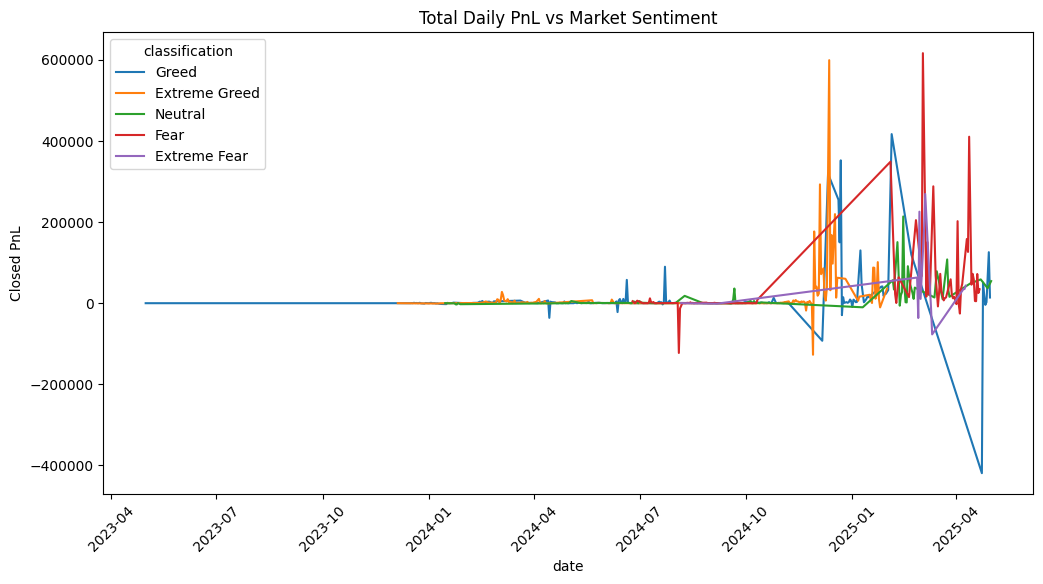

In [24]:
daily_pnl = df.groupby(['date', 'classification'])['Closed PnL'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Closed PnL', hue='classification', data=daily_pnl)
plt.title('Total Daily PnL vs Market Sentiment')
plt.xticks(rotation=45)
plt.show()